# **Project-2**

In this project, you will analyze and predict the weekly sales for a retail store. The dataset includes weekly sales data for *45* store locations over a *143-week* period. Create a machine learning model (**regression**) to predict weekly sales values using the train and test datasets provided.

**Dataset Details:**

*Store*: Store number

*Week*: 1 through 143

*Temperature*: Weekly outside temperature

*Holiday*: Yes for holiday week, No for non-holiday week

*CPI*: The Consumer Price Index

*Fuel Price*: Price per gallon

*Unemployment*: Unemployment rate

*WeeklySales*: Total sales amount


**Datasets Locations and Names:**
Canvas -> Modules -> Week 5 -> Datasets -> "trainSales.csv" and "testSales.csv".

Download the .ipynb file and save as FirstName_LastName_Project2.ipynb. Please submit (upload) your source code to Canvas.

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

salesTrain = pd.read_csv("trainSales.csv")
salesTest = pd.read_csv("testSales.csv")

In [76]:
X_train = salesTrain.drop(columns=['WeeklySales'])
y_train = salesTrain['WeeklySales']

X_test = salesTest.drop(columns=['WeeklySales'])
y_test = salesTest['WeeklySales']

cat_feat = ['Holiday']
num_feat = [ 'CPI', 'FuelPrice',  'Unemployment', 'Temperature', 'Week']

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

cat_trans = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
                        ])

num_trans = Pipeline([
    ('scaler', StandardScaler())
])


prepross = ColumnTransformer(
    transformers=[
        ('num', num_trans, num_feat),
        ('cat', cat_trans, cat_feat),
    ]
)

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([
    ('preprocessor', prepross),
    ('model', LinearRegression())
])

pipeline_random_forest = Pipeline([
    ('preprocessor', prepross),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

pipeline.fit(X_train,y_train)
pipeline_random_forest.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_pred_rand_forest = pipeline_random_forest.predict(X_test)

mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

mse_rand_forest = mean_squared_error(y_test,y_pred_rand_forest)
r2_rand_forest = r2_score(y_test,y_pred_rand_forest)
mae_rand_forest = mean_absolute_error(y_test,y_pred_rand_forest)


print(mse)
print(mae)
print(r2)

print(mse_rand_forest)
print(mae_rand_forest)
print(r2_rand_forest)

316154980271.45013
471570.28296689625
0.030177798153155244
281638975392.58484
388661.874503212
0.1360574772328158


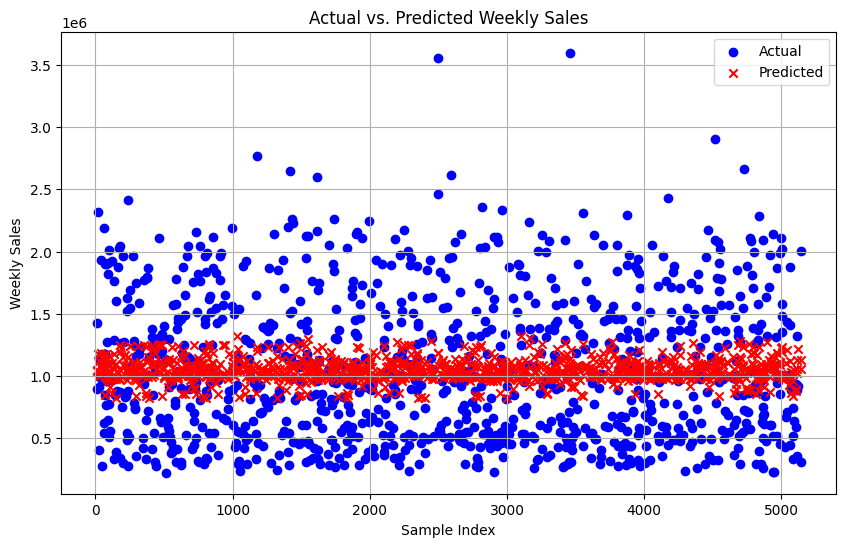

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a DataFrame for actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot the actual vs. predicted values with different colors
plt.figure(figsize=(10, 6))
plt.scatter(results_df.index, results_df['Actual'], label='Actual', color='blue', marker='o')
plt.scatter(results_df.index, results_df['Predicted'], label='Predicted', color='red', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.title('Actual vs. Predicted Weekly Sales')
plt.grid(True)
plt.show()


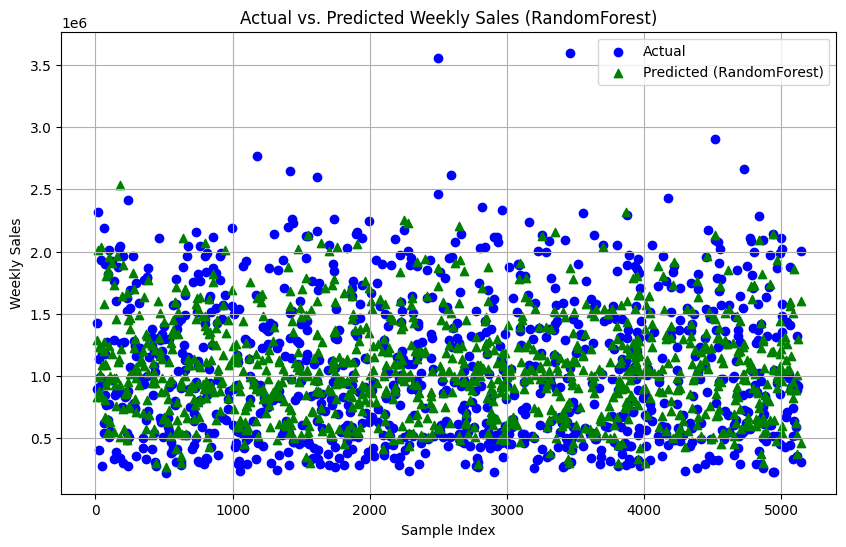

In [81]:
# Create a DataFrame for actual and predicted values
results_rf_df = pd.DataFrame({'Actual': y_test, 'Predicted (RandomForest)': y_pred_rand_forest})

# Plot the actual vs. RandomForest predicted values with different colors
plt.figure(figsize=(10, 6))
plt.scatter(results_rf_df.index, results_rf_df['Actual'], label='Actual', color='blue', marker='o')
plt.scatter(results_rf_df.index, results_rf_df['Predicted (RandomForest)'], label='Predicted (RandomForest)', color='green', marker='^')
plt.xlabel('Sample Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.title('Actual vs. Predicted Weekly Sales (RandomForest)')
plt.grid(True)
plt.show()

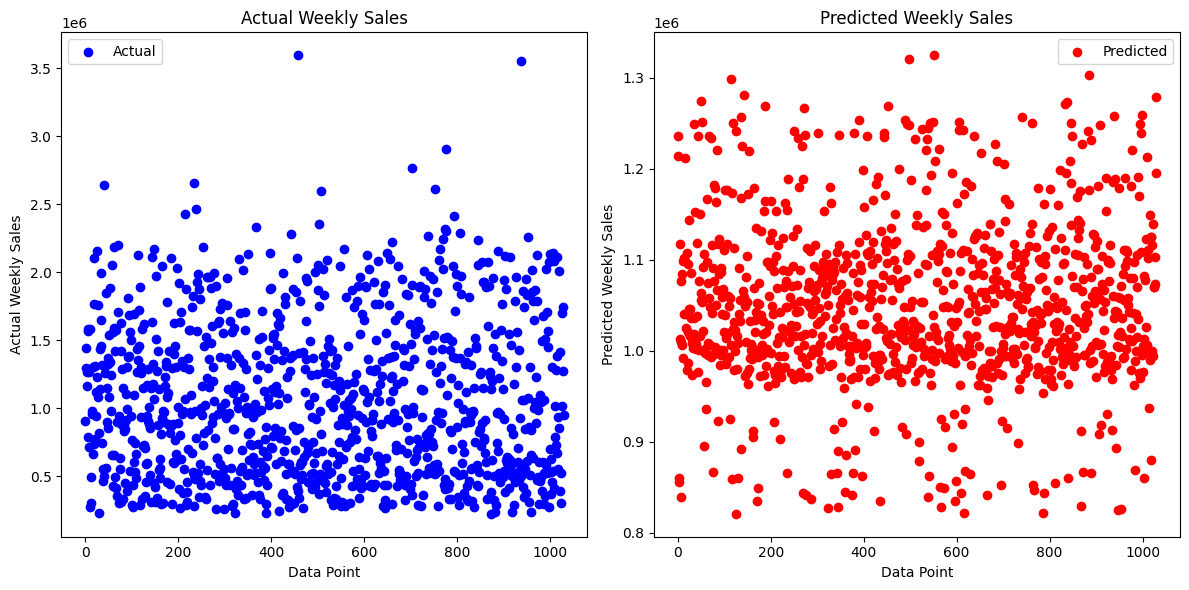

In [82]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the actual test values
ax1.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
ax1.set_xlabel("Data Point")
ax1.set_ylabel("Actual Weekly Sales")
ax1.set_title("Actual Weekly Sales")

# Plot the predicted values
ax2.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
ax2.set_xlabel("Data Point")
ax2.set_ylabel("Predicted Weekly Sales")
ax2.set_title("Predicted Weekly Sales")

# Add legends
ax1.legend()
ax2.legend()

# Show the plots
plt.tight_layout()
plt.show()
